<h1>Self Assessment Python Language</h1>

Setelah mengikuti kelas Introduction to Python Language pada kursus online Programming Foundation for Data Science, saya akan menjawab Self Asseessment Python Language dari [Skill Academy by Ruangguru](https://skillacademy.com/course-detail/programming-foundation-for-data-science/COURSE-HLAHYVX8).

In [1]:
#import moduls yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

#memasukkan file ke dalam dataset
dataset = pd.read_csv(r"C:\Users\LENOVO\Downloads\Assessment R & Python_ Dataset_superstore_simple.csv")

In [2]:
#preview mengenai dataset
dataset.head(5)

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714
3,US-2015-108966,2015-10-11,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310
4,US-2015-108966,2015-10-11,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 9 columns):
order_id        9988 non-null object
order_date      9988 non-null object
customer_id     9988 non-null object
segment         9988 non-null object
category        9988 non-null object
sub_category    9988 non-null object
sales           9988 non-null float64
quantity        9988 non-null int64
profit          9988 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 702.4+ KB


Mari kita mulai mengerjakan soalnya.
<h2>Carilah customer_id yang memiliki sales paling besar!</h2>

Untuk mencarinya, maka yang akan dilakukan adalah:
- Melakukan agregasi data terhadap kolom customer_id dan sales, sehingga diketahui jumlah sales yang dilakukan tiap customer_id.
- Mengurutkan hasil agregasi data berdasarkan jumlah sales, dari yang paling besar nilainya hingga yang paling bawah nilainya.

In [4]:
dataset_grouped = dataset.pivot_table(index = "customer_id",
                                      values = "sales", 
                                      aggfunc = np.sum).sort_values(by = "sales", ascending = False)
dataset_grouped.head()

,sales
customer_id,
AB-10105,14473.571
KL-16645,14175.229
SC-20095,14142.334
SE-20110,12209.438
CC-12370,12129.072


<h2>Sub-category apa saja yang ada di dalam Category 'Office Supplies', dan masing-masing berapa banyak total profitnya? </h2>

Untuk menjawab pertanyaan ini, yang akan dilakukan adalah:
- Membuat dataset baru, dimana dataset ini semua nilai dari kolom Category adalah "Office Supplies".
- Melakukan agregasi data berdasarkan kolom Sub-category dan profit, sehingga diketahui profit dari masing-masing sub-category.

In [5]:
office_supply = dataset[dataset["category"] == "Office Supplies"]

#lihat hasil datanya terlebih dahulu
office_supply.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,Office Supplies,Labels,14.620,2,6.8714
4,US-2015-108966,2015-10-11,SO-20335,Consumer,Office Supplies,Storage,22.368,2,2.5164
6,CA-2014-115812,2014-06-09,BH-11710,Consumer,Office Supplies,Art,7.280,4,1.9656
8,CA-2014-115812,2014-06-09,BH-11710,Consumer,Office Supplies,Binders,18.504,3,5.7825
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,Office Supplies,Appliances,114.900,5,34.4700


In [6]:
office_sub_category = office_supply.pivot_table(index = "sub_category",
                                         values = "profit",
                                         aggfunc = sum).sort_values(by = "profit",
                                                                   ascending = False)

office_sub_category

,profit
sub_category,
Paper,34053.5693
Binders,30221.7633
Storage,21278.8264
Appliances,18138.0054
Envelopes,6964.1767
Art,6527.7870
Labels,5546.2540
Fasteners,949.5182
Supplies,-1189.0995


<h2>Berapa banyak order yang menghasilkan profit negatif (rugi)?</h2>

Untuk menjawab persoalan ini, yang akan dilakukan adalah:
- Membuat dataset baru, dimana dalam dataset ini semua nilai dari kolom profit bernilai negatif

In [7]:
negative_profit = dataset[dataset["profit"] > 0]

negative_profit.shape[0]

8054

<h2>Antara 3 customer_id ini, mana yang total sales-nya paling banyak: JE-16165, KH-16510, AD-10180?</h2>

Untuk menjawab pertanyaan ini, maka yang akan dilakukan adalah:
- Kita akan membuat dataset dimana hanya ada 3 buah customer_id yang dicari.
- Kemudian, kita akan membuat agregasi data, dimana akan ada 3 buah customer_id itu bersama dengan total salesnya, dimana akan diurutkan berdasarkan total salesnya.

In [8]:
dataset_new = dataset[(dataset["customer_id"] == "JE-16165")|
                     (dataset["customer_id"] == "AD-10180")|
                     (dataset["customer_id"] == "KH-16510")]

dataset_new_group = dataset_new.pivot_table(index = "customer_id",
                                      values = "sales", 
                                      aggfunc = np.sum).sort_values(by = "sales", ascending = False)

dataset_new_group

,sales
customer_id,
AD-10180,6106.880
KH-16510,5952.859
JE-16165,2697.248


<h2>Buatlah data frame yang bernama 'yearly_sales' yang berisi total sales, jumlah customer, dan total profit tiap tahun. Tahun berapa profit tertinggi diperoleh?</h2>

Untuk mengerjakannya, maka yang akan dilakukan:
- Kita akan menambahkan kolom baru, yang berisi tahun dari tiap order_date
- Kita akan membuat dataset baru, yang berisi jumlah dari sales, customer, dan profit tiap tahun, dimana urutannya ditentukan oleh jumlah profit.

In [9]:
dataset["order_date"] = pd.to_datetime(dataset["order_date"])
dataset["order_year"] = dataset["order_date"].dt.year

dataset.head()

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit,order_year
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164,2015


In [10]:
yearly_sales = dataset.groupby("order_year").aggregate({"profit" : np.sum,
                                                       "sales" : np.sum,
                                                       "customer_id" : len}).sort_values(by = "profit",
                                                                                         ascending = False)

yearly_sales

,profit,sales,customer_id
order_year,,,
2016,79995.1763,587205.6630,2585
2017,77759.3144,697515.3572,3309
2015,61618.6037,470532.5090,2102
2014,51355.0525,461609.0181,1992


<h2>Buatlah scatterplot antara sales dan profit untuk data di tahun 2014-2015 saja, bedakan warnanya antara tahun 2014 dan tahun 2015. Beri judul "Sales vs Profit 2014-2015"!</h2>

Untuk menjawab soal ini, yang akan dilakukan adalah:
- Mencari semua data dengan order_year 2014 atau 2015.
- Membuat scatter plot dimana untuk nilai x nya diambil dari nilai kolom profit, sedangkan untuk nilai y nya diambil dari nilai kolom sales.

In [11]:
yearly_sales_14_15 = dataset[(dataset["order_year"] == 2014)|
                            (dataset["order_year"] == 2015)]
yearly_sales_14_15

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit,order_year
3,US-2015-108966,2015-10-11,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164,2015
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,Furniture,Furnishings,48.8600,7,14.1694,2014
6,CA-2014-115812,2014-06-09,BH-11710,Consumer,Office Supplies,Art,7.2800,4,1.9656,2014
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,Technology,Phones,907.1520,6,90.7152,2014
...,...,...,...,...,...,...,...,...,...,...
9965,CA-2015-103772,2015-06-28,MP-17470,Home Office,Office Supplies,Art,140.7500,5,42.2250,2015
9974,US-2015-151435,2015-09-06,SW-20455,Consumer,Furniture,Tables,85.9800,1,22.3548,2015
9978,CA-2015-100251,2015-05-17,DV-13465,Consumer,Office Supplies,Labels,31.5000,10,15.1200,2015
9979,CA-2015-100251,2015-05-17,DV-13465,Consumer,Office Supplies,Supplies,55.6000,4,16.1240,2015


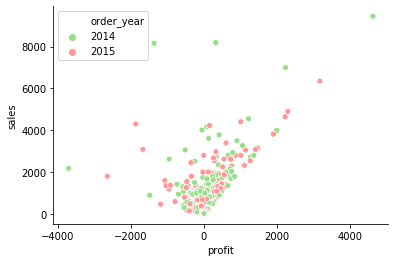

In [12]:
style = {"axes.spines.right" : False,
        "axes.spines.top" : False}

with plt.style.context(style):
    ax = sns.scatterplot(data = yearly_sales_14_15,
                        x = "profit",
                        y = "sales",
                        hue = "order_year",
                        palette = [(152/255,223/255,138/255), (255/255,152/255,150/255)],
                        legend = "full")

<h2>Buatlah barchart yang berisi total profit dari 10 customer dengan total sales tertinggi di tahun 2015!</h2>

Untuk menjawab soal ini, maka yang akan dilakukan adalah:
- Membuat dataset dimana nilai dari kolom order_year hanya 2015.
- Mengagregasi nilai dataset tersebut berddasarkan customer_id dan jumlah salesnya, lalu diurutkan berdasarkan jumlah salesnya.

In [13]:
dataset_new = dataset[dataset["order_year"] == 2015]

dataset_10 = dataset_new.pivot_table(index = "customer_id",
                                      values = "sales", 
                                      aggfunc = np.sum).sort_values(by = "sales", ascending = False).iloc[:10]
dataset_10

,sales
customer_id,
PF-19120,9022.324
KD-16495,7039.044
CM-12385,6682.260
FH-14365,6056.090
NW-18400,5511.316
SB-20185,5414.246
JH-15985,5352.786
HM-14860,5327.802
CB-12025,4662.553


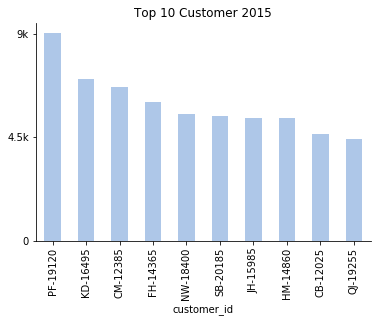

In [15]:
with plt.style.context(style):
    ax = dataset_10.plot(kind = "bar",
                        title = "Top 10 Customer 2015",
                        yticks = [0, 4500, 9000],
                        color = (174/255,199/255,232/255),
                        legend = False)
    ax.set_yticklabels([0, "4.5k", "9k"])